# Chronic Kidney Disease Dataset

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv("data.csv")

In [74]:
#Checking first 5 row of data
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [75]:
#basic info related to our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

In [76]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,45,93,47,3,6,4,3,3,3,2
top,60,80,1.02,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,70,105,130,251,258,362,317,323,339,250


# Data Pre-processing

In [77]:
#Nan value are represented in the data by "?" so we are replaceing ? from np.nan
x="?"
for i in df.columns:
    for j in range(df.shape[0]):
        if x in (df[i][j]):
            df[i][j]=np.nan

In [78]:
#checking null values
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [79]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391,388,353,354,351,248,335,396,396,356,...,329,294,269,398,398,398,399,399,399,400
unique,76,10,5,6,6,2,2,2,2,146,...,43,91,45,2,5,3,2,2,2,2
top,60,80,1.02,0,0,normal,normal,notpresent,notpresent,99,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,10,...,21,11,18,251,258,362,317,323,339,250


In [80]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [81]:
#converting the data type of the dataset
df[["age","bp","bgr","bu","sc","sod","pot","hemo","pcv","wbcc","rbcc"]]=df[["age","bp","bgr","bu","sc","sod","pot","hemo","pcv","wbcc","rbcc"]].apply(pd.to_numeric)

In [82]:
df.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [83]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1,0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [84]:
#checking null values in our dataset
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [85]:
# Dividing the categorical and numeric columns for processing
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [86]:
num_cols

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

In [87]:
#Checking the null values in numeric data
df[num_cols].isnull().sum()

age       9
bp       12
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wbcc    106
rbcc    131
dtype: int64

In [88]:
#Checking the null values in categorical data
df[cat_cols].isnull().sum()

sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [89]:
df.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


### Filling Nan with mean/mode/median
For filling nan we have to check distribution and boxplot for choosing correct imputation method(mean,mode,median)

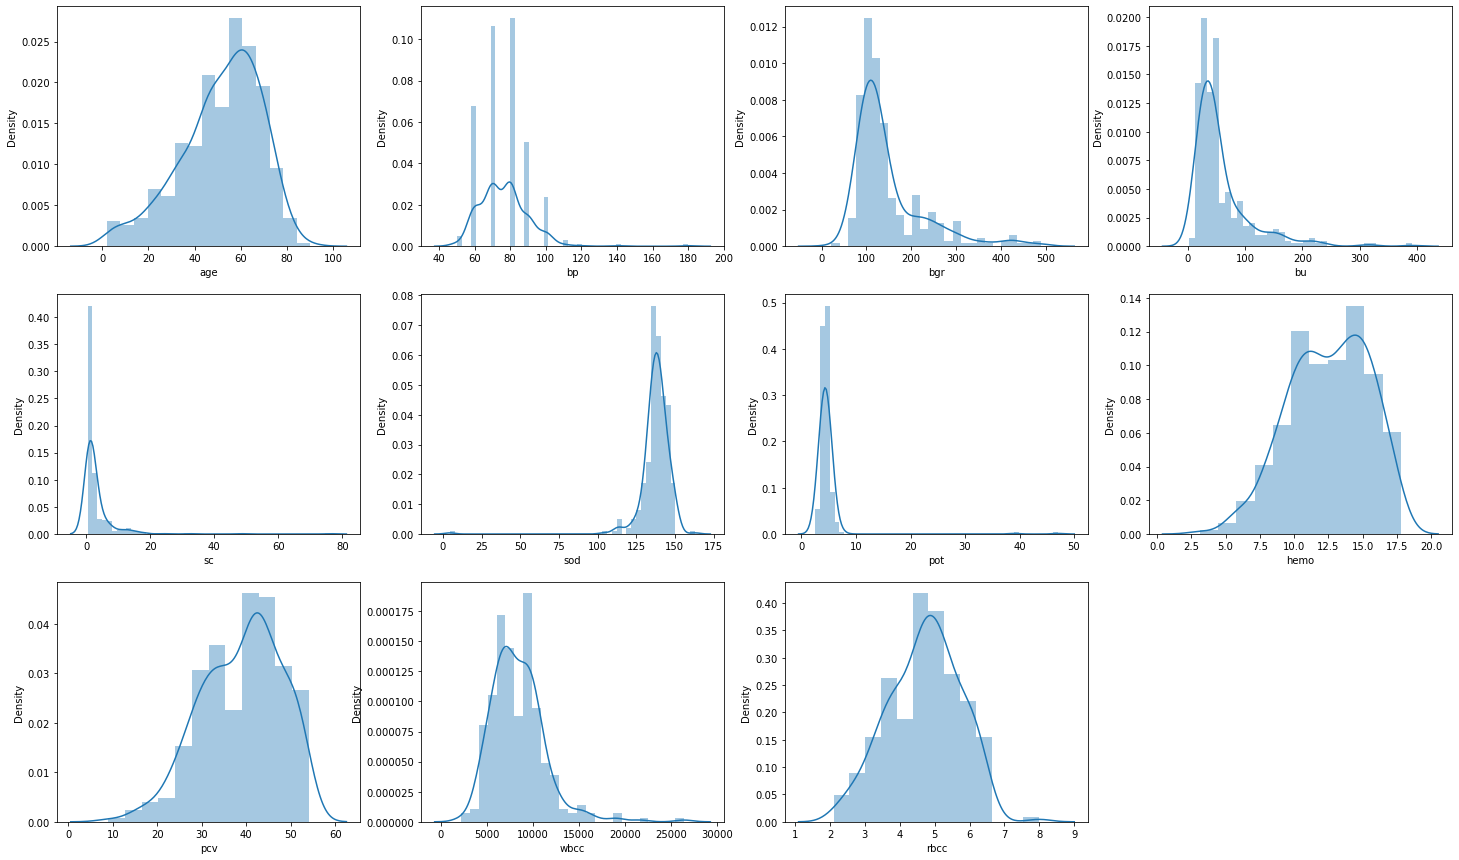

In [90]:
#Distribution plots for all numerical value feature
plot_number=1
plt.figure(figsize = (25, 15))
for i in num_cols:
    
    ax = plt.subplot(3, 4,plot_number)
    sns.distplot(df[i])
    plot_number=plot_number+1
plt.show() 

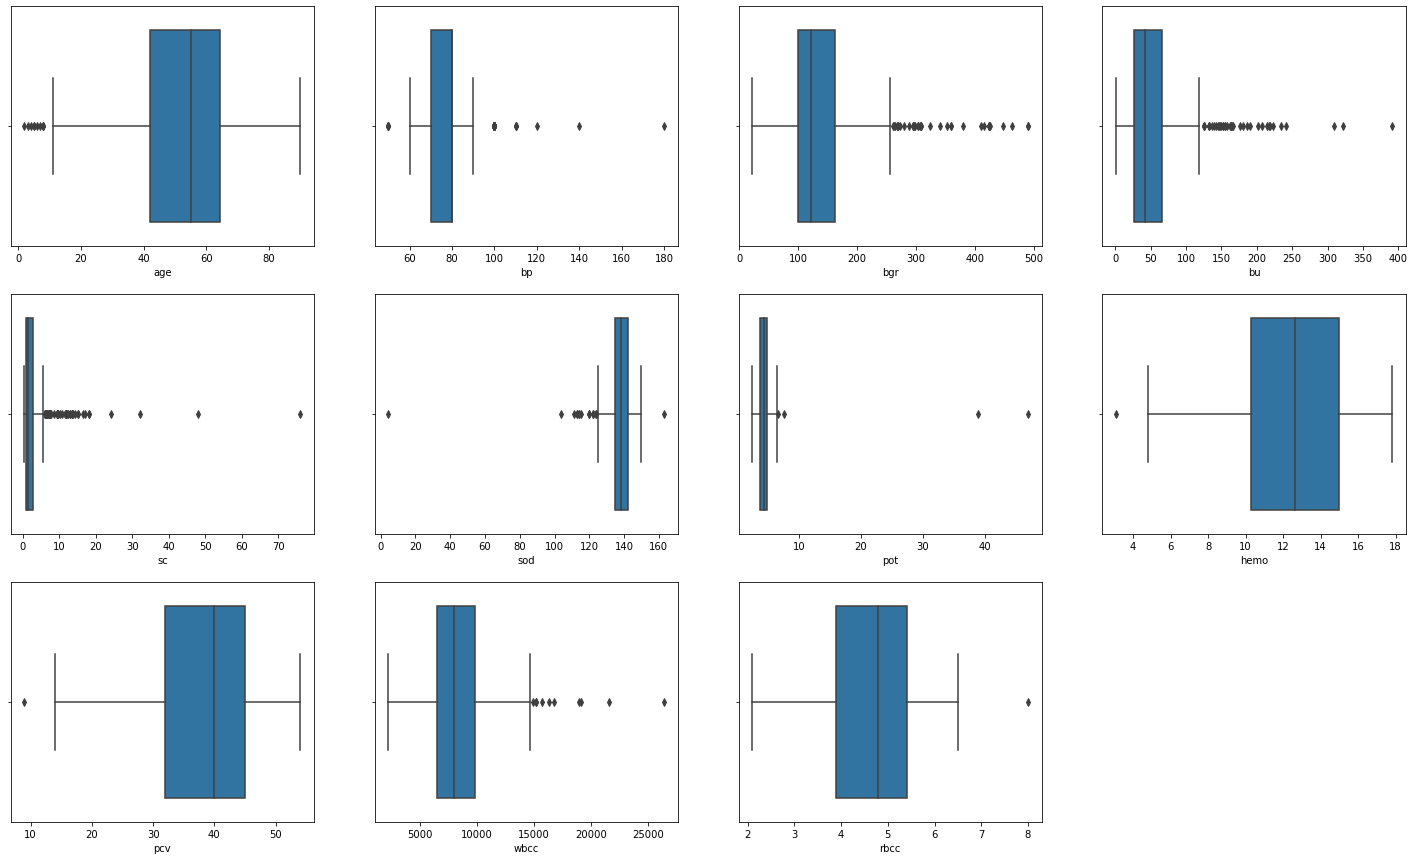

In [91]:
#Distribution plots for all numerical value feature
plotnumber=1
plt.figure(figsize = (25, 15))
for i in num_cols:
    
    ax = plt.subplot(3, 4,plotnumber)
    sns.boxplot(df[i])
    plotnumber=plotnumber+1
plt.show() 

In [92]:
#after obeserving the graphs we found that we can fill "pcv","rbcc","hemo" columns with mean due 
#to distribution of data and outliers and remaining ones with median 
mean_value_data=["pcv","rbcc","hemo"]

for i in mean_value_data:
    df[i]=df[i].fillna(df[i].mean())

for i in num_cols:
    if i not in mean_value_data:
        df[i]=df[i].fillna(df[i].median())

In [93]:
#Filling Nan for categorical features. For that we used mode
for i in cat_cols:
    df[i]=df[i].fillna(df[i].value_counts().index[0])


In [94]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [95]:
df["dm"]=df['dm'].replace(" yes","yes") #DM column contains 2 type of yes so we replace with one type of yes data

In [96]:
#checking the unique values in categorical data
for i in cat_cols:
    print(i + ":",df[i].unique())

sg: ['1.02' '1.01' '1.005' '1.015' '1.025']
al: ['1' '4' '2' '3' '0' '5']
su: ['0' '3' '4' '1' '2' '5']
rbc: ['normal' 'abnormal']
pc: ['normal' 'abnormal']
pcc: ['notpresent' 'present']
ba: ['notpresent' 'present']
htn: ['yes' 'no']
dm: ['yes' 'no' '\tno' '\tyes']
cad: ['no' 'yes' '\tno']
appet: ['good' 'poor']
pe: ['no' 'yes']
ane: ['no' 'yes']
class: ['ckd' 'notckd']


In [97]:
df[["sg","al","su"]]=df[["sg","al","su"]].apply(pd.to_numeric)  #converting the columns to numeric for model input

In [98]:
#Mapping the categorical values 
normal_abnormal_data={"normal":1,"abnormal":0}
present_notpresent={"notpresent":0,"present":1}
yes_no_data={"yes":1,"no":0,"\tno":0,"\tyes":1,"yes":1}
good_bad={"good":1,"poor":0}
class_data={'ckd':0,'notckd':1}

df["rbc"]=df["rbc"].map(normal_abnormal_data)
df['pc']=df['pc'].map(normal_abnormal_data)
df['pcc']=df['pcc'].map(present_notpresent)
df['ba']=df['ba'].map(present_notpresent)
df["htn"]=df["htn"].map(yes_no_data)
df['ane']=df['ane'].map(yes_no_data)
df["pe"]=df["pe"].map(yes_no_data)
df['cad']=df['cad'].map(yes_no_data)
df['dm']=df['dm'].map(yes_no_data)
df["appet"]=df["appet"].map(good_bad)
df["class"]=df["class"].map(class_data)


In [99]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,1,1,0,0,121.0,...,44.0,7800.0,5.200000,1,1,0,1,0,0,0
1,7.0,50.0,1.020,4,0,1,1,0,0,121.0,...,38.0,6000.0,4.707435,0,0,0,1,0,0,0
2,62.0,80.0,1.010,2,3,1,1,0,0,423.0,...,31.0,7500.0,4.707435,0,1,0,0,0,1,0
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.900000,1,0,0,0,1,1,0
4,51.0,80.0,1.010,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.600000,0,0,0,1,0,0,0


In [133]:
#checking correlation of columns with our target column(Class)

corr_data=pd.DataFrame({"Correlation with target":df.corrwith(df["class"],axis=0)})

corr_data

,Correlation with target
age,-0.227842
bp,-0.293693
sg,0.659504
al,-0.531562
su,-0.294555
rbc,0.282642
pc,0.375154
pcc,-0.265313
ba,-0.186871
bgr,-0.379321


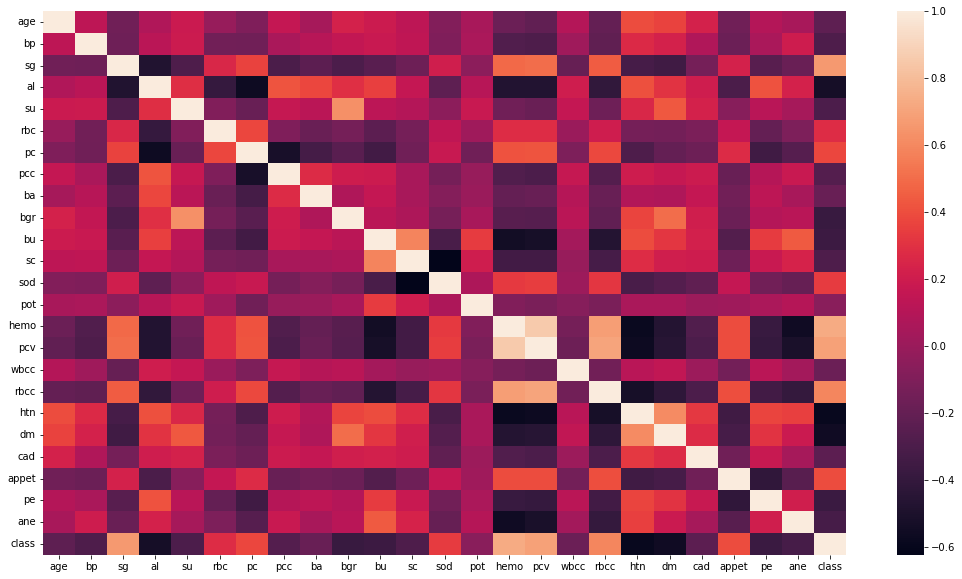

In [137]:
#Correlation heatmap of data
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df.corr(), ax=ax)
plt.show()

# Model Building

In [104]:
x=df.iloc[:,:df.shape[1]-1]
y=df["class"]

In [105]:
#dividing the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=23)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.8
Test Accuracy of KNN is 0.76 

Confusion Matrix :- 
[[46 15]
 [ 9 30]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.75      0.79        61
           1       0.67      0.77      0.71        39

    accuracy                           0.76       100
   macro avg       0.75      0.76      0.75       100
weighted avg       0.77      0.76      0.76       100



In [107]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.99 

Confusion Matrix :- 
[[60  1]
 [ 0 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.97      1.00      0.99        39

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [108]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(X_train, y_train)
lg_acc = accuracy_score(y_test, lg.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, lg.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {lg_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, lg.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, lg.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.9466666666666667
Test Accuracy of Random Forest Classifier is 0.89 

Confusion Matrix :- 
[[57  4]
 [ 7 32]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        61
           1       0.89      0.82      0.85        39

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



In [109]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 1.0 

Confusion Matrix :- 
[[61  0]
 [ 0 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        39

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [110]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.96 

Confusion Matrix :- 
[[57  4]
 [ 0 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        61
           1       0.91      1.00      0.95        39

    accuracy                           0.96       100
   macro avg       0.95      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100



In [111]:
from sklearn.naive_bayes import GaussianNB  
clg = GaussianNB()  
clg.fit(X_train, y_train)  

clg_acc = accuracy_score(y_test, clg.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, clg.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {clg_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, clg.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, clg.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9666666666666667
Test Accuracy of Decision Tree Classifier is 0.96 

Confusion Matrix :- 
[[57  4]
 [ 0 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        61
           1       0.91      1.00      0.95        39

    accuracy                           0.96       100
   macro avg       0.95      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100



In [112]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.94 

Confusion Matrix :- 
[[56  5]
 [ 1 38]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        61
           1       0.88      0.97      0.93        39

    accuracy                           0.94       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.94      0.94      0.94       100



In [113]:
models_data = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier','Extra Trees Classifier',"LogisticRegression", "Naive Bayes"],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, etc_acc,lg_acc,clg_acc]
})


models_data.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Extra Trees Classifier,1.00
2,Random Forest Classifier,0.99
1,Decision Tree Classifier,0.96
6,Naive Bayes,0.96
3,Ada Boost Classifier,0.94
5,LogisticRegression,0.89
0,KNN,0.76


# Accuracy Graph

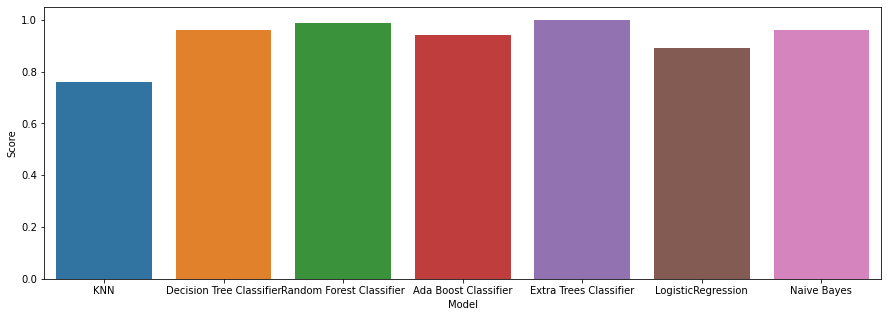

In [114]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(models_data["Model"],models_data["Score"], ax=ax)
plt.show()